In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks


### Silicon strip sensor

In [2]:
# Load the laser scan matrix
laser_scan_path = "C:/Users/Ephi/Dropbox/Silicon strip/Mehammed/Laserscan.txt"
laser_scan_data = pd.read_csv(laser_scan_path, sep=',')

# Display shape of the data to understand its structure
print(laser_scan_data.shape)
#print(laser_scan_data.head())

(34, 1)


In [3]:
plt.style.use('seaborn-v0_8-paper')
plt.rcParams["patch.force_edgecolor"] = True
# increse font size numbers on the axes
plt.rcParams.update({'xtick.labelsize': 12})
plt.rcParams.update({'ytick.labelsize': 12})
#set axis label size
plt.rcParams.update({'axes.labelsize': 12})

#figure size
plt.rcParams.update({'figure.figsize': (6, 4)})

In [4]:
# Use raw string to handle the Windows path and spaces
file_path = r"C:\Users\Ephi\Dropbox\Silicon strip\Mehammed\curr_volt.xlsx"
currvolt = pd.read_excel(file_path)

# Display the content to verify
print(currvolt.head())

   Voltage   Current
0         0     0.86
1        10     0.96
2        20     1.10
3        30     1.19
4        40     1.28


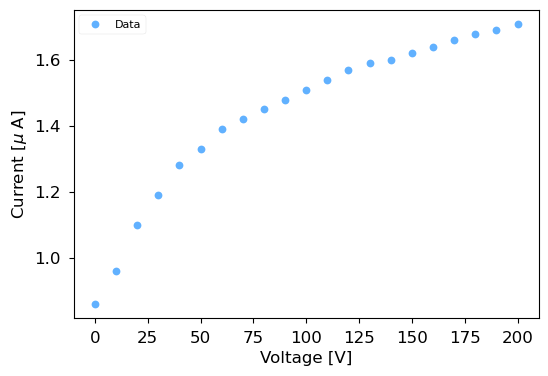

In [5]:
# Plot the data
plt.figure(figsize=(6, 4))
plt.plot(currvolt.values[:,0], currvolt.values[:,1], 'o', color='dodgerblue',alpha = 0.7, label='Data')
plt.xlabel('Voltage [V]')
plt.ylabel('Current [$\\mu$ A]')
plt.legend()

#save the plot
plt.savefig("C:/Users/Ephi/Dropbox/Silicon strip/Plots/iv_curve.png")
plt.show()

### Pedestal Noise

In [6]:
# open txt file pandas
pedestal = pd.read_csv('C:/Users/Ephi/Dropbox/Silicon strip/Mehammed/Pedestal.txt', sep=';', header=None)
print(pedestal.values.shape)

#store the mean of each row in a new array
p = np.mean(pedestal.values, axis=1)
print(pedestal.values.shape[0])

# transofrm pedestal valiues 
pedestal.values 

(128, 1000)
128


array([[519., 518., 509., ..., 518., 521., 512.],
       [507., 510., 516., ..., 515., 515., 512.],
       [515., 514., 511., ..., 511., 518., 512.],
       ...,
       [510., 511., 506., ..., 513., 516., 511.],
       [513., 513., 507., ..., 514., 511., 511.],
       [513., 517., 506., ..., 515., 517., 512.]])

(128, 1000)
(128,)


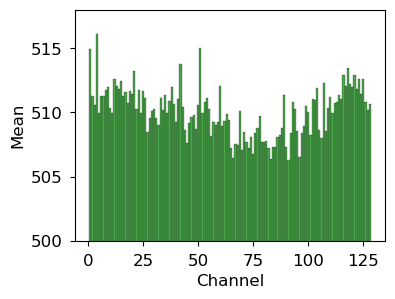

In [7]:
# open txt file pandas
pedestal = pd.read_csv('C:/Users/Ephi/Dropbox/Silicon strip/Mehammed/Pedestal.txt', sep=';', header=None)
print(pedestal.values.shape)

#store the mean of each row in a new array
p = np.mean(pedestal.values, axis=1)
print(p.shape)

#plot as hisogram using bar
plt.figure(figsize=(4, 3))
plt.bar(np.linspace(1,pedestal.values.shape[0],pedestal.values.shape[0]), p, width=1.0,  color='green',alpha = 0.7, label='Data')
#set y limit
plt.ylim(500, 518)
plt.xlabel('Channel')
plt.ylabel('Mean')

#save the plot
plt.savefig("C:/Users/Ephi/Dropbox/Silicon strip/Plots/pedestal.png")

plt.show()

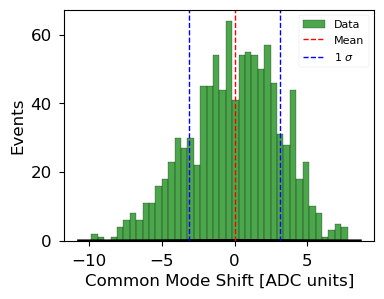

In [8]:
# compute D(k) = (1/128) * sum_{i=1}^{128} (ADC_{i,k} - p_{i})
# where p_{i} is the mean of the k-th row and ADC_{i,k} is the i-th value of the k-th row
D = np.zeros(1000)
for k in range(1000):
        D[k] = np.sum(pedestal.values[:,k] - p, axis=0) / 128

# plot the D(k) values as histogram
plt.figure(figsize=(4,3))

plt.hist(D, bins=40,  color='green',alpha = 0.7, label='Data')
plt.xlabel('Common Mode Shift [ADC units]')
plt.ylabel('Events')

#fit a gaussian to the data
from scipy.stats import norm
mu, std = norm.fit(D)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
pp = norm.pdf(x, mu, std)
plt.plot(x, pp, 'k', linewidth=2)

#plot in the graph the mean and std

plt.axvline(mu, color='r', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(mu + std, color='blue', linestyle='dashed', linewidth=1, label= '1 $\\sigma$')
plt.axvline(mu - std, color='blue', linestyle='dashed', linewidth=1)

plt.legend()
plt.savefig("C:/Users/Ephi/Dropbox/Silicon strip/Plots/common mode.png")
plt.show()

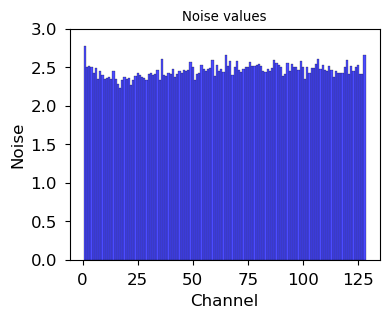

In [9]:
# compute noise
# noise(i) = sqrt(1/(1000 -1) sum_{k=1}^{1000} (pedestal.values(i,k) - p(i) - D_{i})^2)

noise = np.zeros(128)

for i in range(128):
    noise[i] = np.sqrt(1/(1000-1) * np.sum((pedestal.values[i,:] - p[i] - D)**2))

#plot using bar
plt.figure(figsize=(4,3))
plt.bar(np.linspace(1,128,128), noise, width=1.0,  color='blue',alpha = 0.7, label='Data')

plt.ylim(0, 3.0)
plt.xlabel('Channel')
plt.ylabel('Noise')
plt.title('Noise values')

#save the plot
plt.savefig("C:/Users/Ephi/Dropbox/Silicon strip/Plots/noise.png")

plt.show()

### Calibration

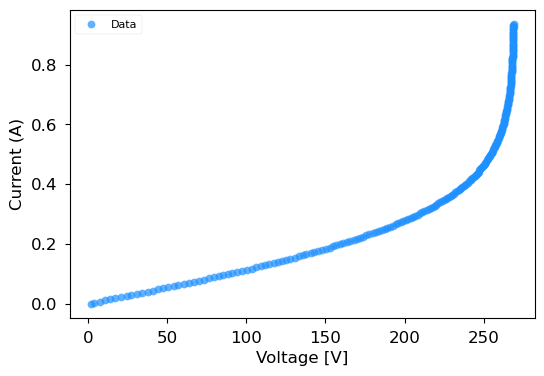

In [10]:
#open csv file
data =  r"C:\Users\Ephi\Dropbox\Silicon strip\Mehammed\Calib\calib_90V_channelunknown.txt"
calib = pd.read_csv(data, sep=';', header=None)

calib = calib.drop([0,1])   #remove the first 2 rows

calib = calib[0].str.split(' ', expand=True)  #separate the columns

#separate the column in 2 with \t as separator
calib = calib[0].str.split('\t', expand=True)

calib = calib.apply(lambda col: col.str.replace(',', '.'))  # to handle decimal format

#convert the values to float
calib = calib.astype(float)

calib[0] = calib[0] * 3.6
calib[0] = calib[0] * 1e-6

#plot the data
plt.figure(figsize=(6,4))
plt.plot(calib[1], calib[0], 'o',  color='dodgerblue',alpha = 0.7, label='Data')
plt.xlabel('Voltage [V]')
plt.ylabel('Current (A)')
plt.legend()

plt.savefig("C:/Users/Ephi/Dropbox/Silicon strip/Plots/voltage current.png")
plt.show()

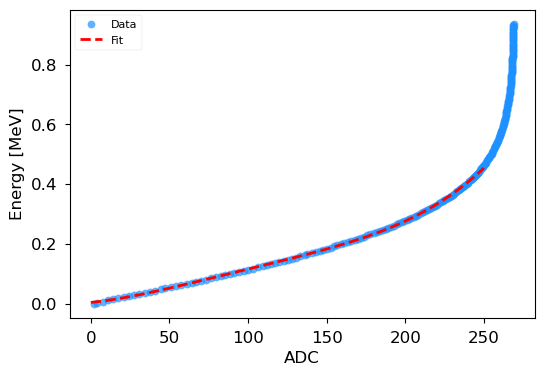

array([ 4.55157722e-03,  5.38482235e-04,  1.21309856e-05, -8.70361174e-08,
        2.34675257e-10])

In [11]:
from scipy.optimize import curve_fit
# Define your polynomial function
def f_conv(x, a, b, c, d, e):
    return a + b*x + c*x**2 + d*x**3 + e*x**4

# Define the fit range
fit_range_min = 0
fit_range_max = 250

# Filter the data within the fit range
x_fit = calib[1][(calib[1] >= fit_range_min) & (calib[1] <= fit_range_max)]
y_fit = calib[0][(calib[1] >= fit_range_min) & (calib[1] <= fit_range_max)]



# Fit the filtered data
popt_conv, pcov_conv = curve_fit(f_conv, x_fit, y_fit)

# Plot the data
plt.plot(calib[1], calib[0], 'o', color='dodgerblue', alpha=0.7, label='Data')

# Plot the fit
x_plot = np.linspace(fit_range_min, fit_range_max, 100)  # Generate x values for the plot
plt.plot(x_plot, f_conv(x_plot, *popt_conv), label='Fit', color='red', linewidth=2, linestyle='--')

plt.xlabel('ADC')
plt.ylabel('Energy [MeV]')
plt.legend()

#save the plot
plt.savefig("C:/Users/Ephi/Dropbox/Silicon strip/Plots/calibration_fit.png")
plt.show()

popt_conv

In [12]:
#print the fit parameters with labels and values
print('Fit parameters and their errors:')
print('a =', popt_conv[0], '+/-', np.sqrt(pcov_conv[0, 0]))
print('b =', popt_conv[1], '+/-', np.sqrt(pcov_conv[1, 1]))
print('c =', popt_conv[2], '+/-', np.sqrt(pcov_conv[2, 2]))
print('d =', popt_conv[3], '+/-', np.sqrt(pcov_conv[3, 3]))
print('e =', popt_conv[4], '+/-', np.sqrt(pcov_conv[4, 4]))

Fit parameters and their errors:
a = 0.004551577217621994 +/- 0.0013801774801580067
b = 0.0005384822353934142 +/- 7.227656374051014e-05
c = 1.213098561862332e-05 +/- 1.1120654350884736e-06
d = -8.703611735014362e-08 +/- 6.349904813990275e-09
e = 2.3467525725452746e-10 +/- 1.2036730115287998e-11


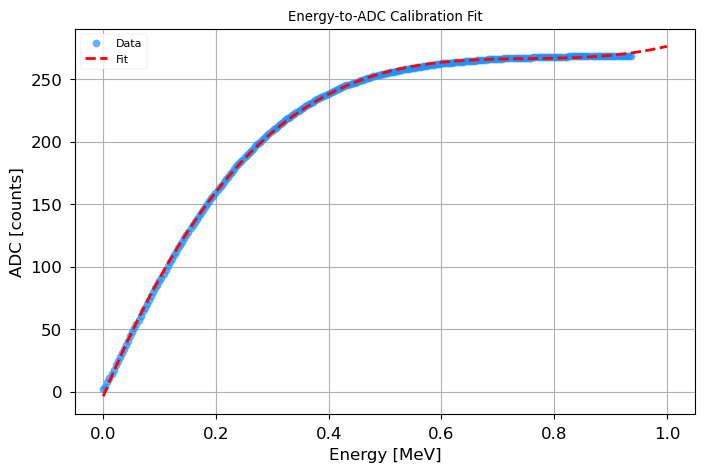

array([   -3.77081739,  1089.07452686, -1502.39468178,   750.41776959,
         -56.96548805])

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# calib[0] = energy (MeV), calib[1] = ADC counts
# axes: x = energy, y = ADC

# Define your polynomial function: ADC = f(energy)
def f_adc(E, a, b, c, d, e):
    return a + b*E + c*E**2 + d*E**3 + e*E**4

# Define the energy fit range
fit_range_min = 0      # MeV
fit_range_max = 1.0    # MeV, or whatever your max is

# Filter the data within the fit range
x_fit = calib[0][(calib[0] >= fit_range_min) & (calib[0] <= fit_range_max)]  # Energy
y_fit = calib[1][(calib[0] >= fit_range_min) & (calib[0] <= fit_range_max)]  # ADC

# Fit the filtered data
popt_adc, pcov_adc = curve_fit(f_adc, x_fit, y_fit)

# Plot the data
plt.figure(figsize=(8, 5))
plt.plot(calib[0], calib[1], 'o', color='dodgerblue', alpha=0.7, label='Data')

# Plot the fit
x_plot = np.linspace(fit_range_min, fit_range_max, 100)  # Energy values
plt.plot(x_plot, f_adc(x_plot, *popt_adc), label='Fit', color='red', linewidth=2, linestyle='--')

plt.xlabel('Energy [MeV]')
plt.ylabel('ADC [counts]')
plt.title("Energy-to-ADC Calibration Fit")
plt.legend()
plt.grid(True)

# Save the plot
plt.savefig("C:/Users/Ephi/Dropbox/Silicon strip/Plots/calibration_fit_energy_to_adc.png")
plt.show()

# Output fit parameters
popt_adc

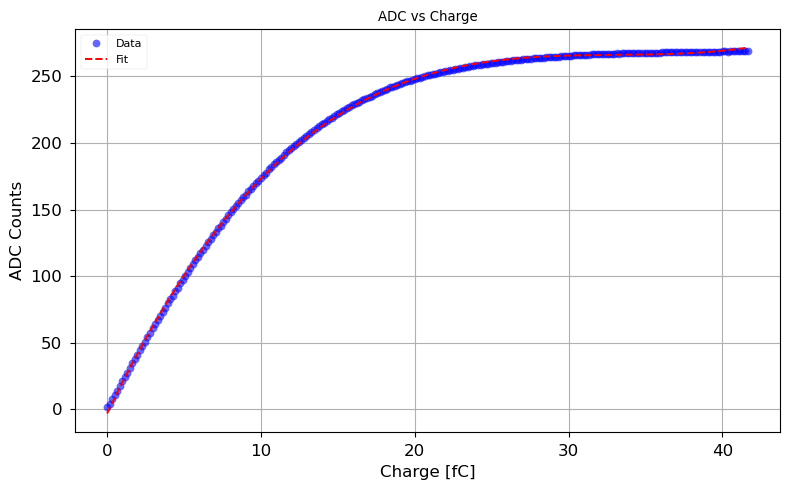

array([-3.15993984e+00,  2.41750895e+01, -7.26304512e-01,  7.30516061e-03])

In [14]:
# Constants
e_charge = 1.602e-19   # Coulombs per electron
pair_energy = 3.6      # eV per e⁻/hole pair

# calib[0] = energy in MeV, calib[1] = ADC
# Convert energy (MeV) to number of electron-hole pairs
E_MeV = calib[0]
ADC_counts = calib[1]

# Convert energy to total charge in fC
# MeV -> eV, then / 3.6 to get # pairs, then * 1.602e-19 (C), then *1e15 to get fC
charge_fC = E_MeV * 1e6 / pair_energy * e_charge*1e15  # in femtocoulombs

# Fit polynomial function
def f_adc(Q, a, b, c, d):
    return a + b*Q + c*Q**2 + d*Q**3

# Select fit range if needed
x_fit = charge_fC
y_fit = ADC_counts

# Perform the fit
popt_charge, pcov_charge = curve_fit(f_adc, x_fit, y_fit)

# Plot ADC vs Charge
plt.figure(figsize=(8, 5))
plt.plot(charge_fC, ADC_counts, 'o', label='Data', color='blue', alpha=0.6)
x_plot = np.linspace(min(charge_fC), max(charge_fC), 200)
plt.plot(x_plot, f_adc(x_plot, *popt_charge), 'r--', label='Fit')

plt.xlabel("Charge [fC]")
plt.ylabel("ADC Counts")
plt.title("ADC vs Charge")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("C:/Users/Ephi/Dropbox/Silicon strip/Plots/adc_vs_charge.png")
plt.show()

# Print fit parameters
popt_charge

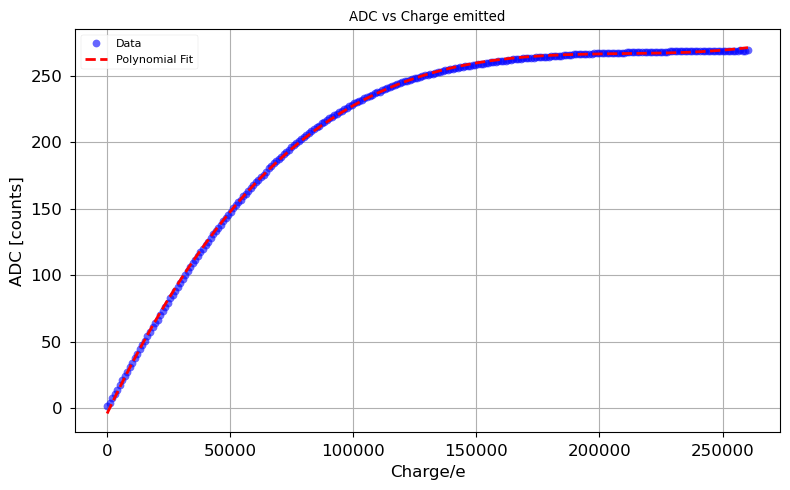

array([-3.77081213e+00,  3.91753407e-03, -1.94399165e-08,  3.49275881e-14,
       -9.53744274e-21])

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Assume: calib[0] = energy [MeV], calib[1] = ADC counts
energy_MeV = calib[0]
adc_counts = calib[1]

# Convert energy to number of e-h pairs
eh_pairs = energy_MeV * 278000  # 1 MeV = 278,000 electron-hole pairs

# Define a 4th-order polynomial: ADC = f(eh_pairs)
def adc_fit_model(n, a, b, c, d, e):
    return a + b*n + c*n**2 + d*n**3 + e*n**4

# Fit range
fit_mask = (eh_pairs >= 0) & (eh_pairs <= np.max(eh_pairs))
x_fit = eh_pairs[fit_mask]
y_fit = adc_counts[fit_mask]

# Perform the polynomial fit
popt_ehp, _ = curve_fit(adc_fit_model, x_fit, y_fit)

# Generate fit curve
x_vals = np.linspace(min(eh_pairs), max(eh_pairs), 300)
y_fit_vals = adc_fit_model(x_vals, *popt_ehp)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(eh_pairs, adc_counts, 'o', label='Data', alpha=0.6, color='blue')
plt.plot(x_vals, y_fit_vals, 'r--', linewidth=2, label='Polynomial Fit')

plt.xlabel("Charge/e")
plt.ylabel("ADC [counts]")
plt.title("ADC vs Charge emitted")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("C:/Users/Ephi/Dropbox/Silicon strip/Plots/adc_vs_ehole_pairs.png")
plt.show()

# Output fit parameters
popt_ehp

### Pedestal measurement

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.optimize import curve_fit


In [17]:
# Load pedestal data from HDF5 again after reset
pedestal_file_path = "C:/Users/Ephi/Dropbox/Silicon strip/Mehammed/Pedestal/Pedestals.h5"
with pd.HDFStore(pedestal_file_path, 'r') as store:
    keys = store.keys()            # List available keys
# Display available datasets in the HDF5 file
keys

[]

In [18]:
import h5py

# Open the HDF5 file using h5py to inspect its internal structure
with h5py.File(pedestal_file_path, 'r') as f:
    # List all top-level keys/groups in the file
    contents = list(f.keys())

contents

['events', 'header', 'scan']

In [19]:
# Open the HDF5 file and explore the contents of the 'events' group
with h5py.File(pedestal_file_path, 'r') as f:
    events_group = f['events']
    event_keys = list(events_group.keys())

event_keys[:10]  # show first 10 entries (assuming each is an event)

['clock', 'header', 'signal', 'temperature', 'time']

In [20]:
# Load the signal data (ADC values per strip per event)
with h5py.File(pedestal_file_path, 'r') as f:
    signal_data = np.array(f['events']['signal'])

# Display shape of the data to confirm format (expected: [events, strips])
signal_data.shape


(1000, 128)

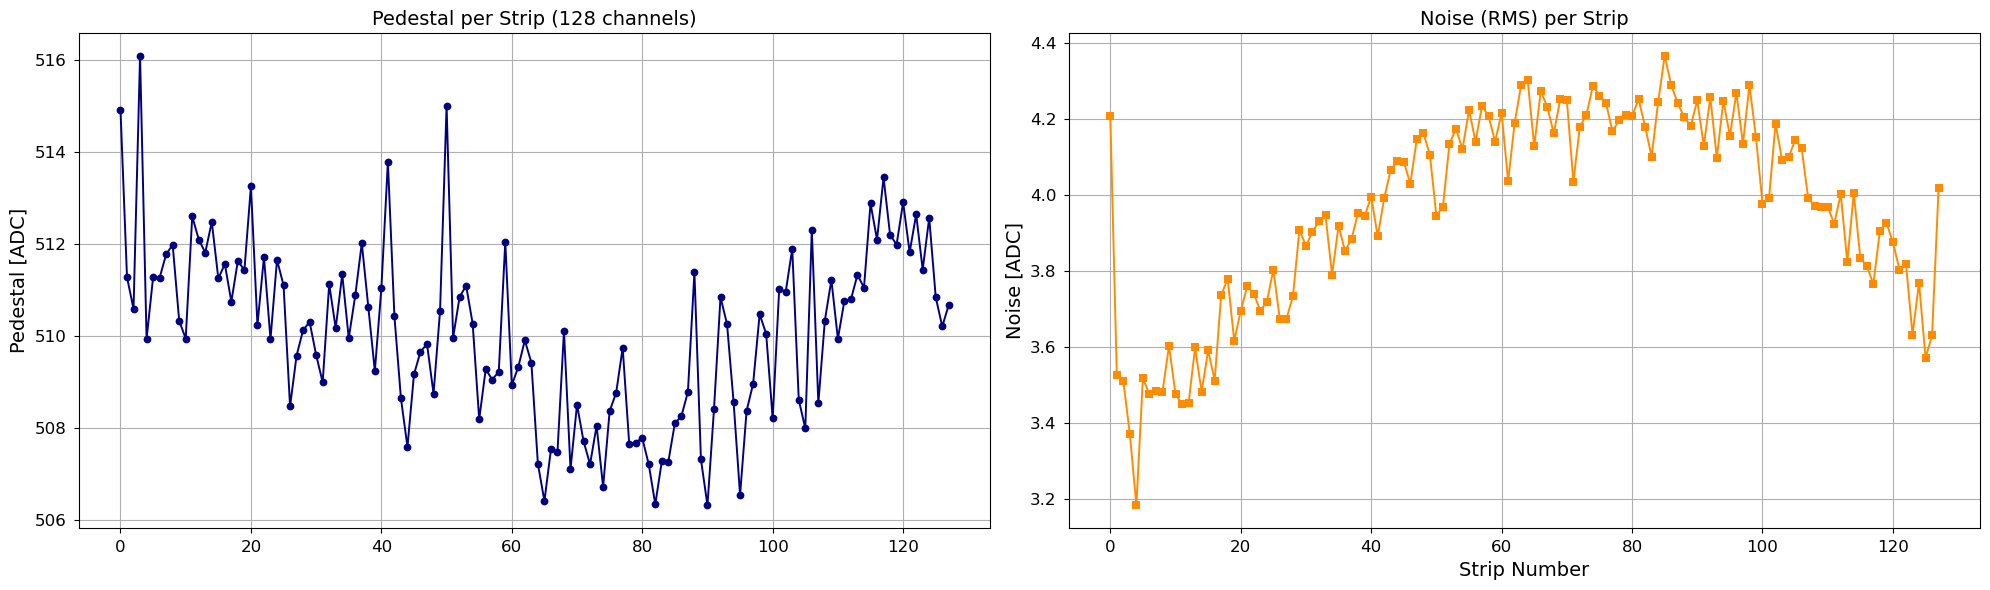

In [21]:
# Compute pedestal (mean per strip)
pedestals = np.mean(signal_data, axis=0)

# Compute noise (RMS per strip)
noise = np.std(signal_data, axis=0)

# Plot pedestals and noise
fig, axs = plt.subplots(1, 2, figsize=(20, 6), sharex=True)

# Pedestals
axs[0].plot(pedestals, marker='o', linestyle='-', color='navy')
axs[0].set_ylabel('Pedestal [ADC]', fontsize = 14)
axs[0].set_title('Pedestal per Strip (128 channels)', fontsize = 14)
axs[0].grid(True)

# Noise
axs[1].plot(noise, marker='s', linestyle='-', color='darkorange')
axs[1].set_xlabel('Strip Number', fontsize = 14)
axs[1].set_ylabel('Noise [ADC]', fontsize = 14)
axs[1].set_title('Noise (RMS) per Strip', fontsize = 14)
axs[1].grid(True)

plt.tight_layout()
plt.savefig("C:/Users/Ephi/Dropbox/Silicon strip/Plots/pedestal per strip.png")
plt.show()

### Measuring sensor strip by using laser

Data shape: (34, 128)


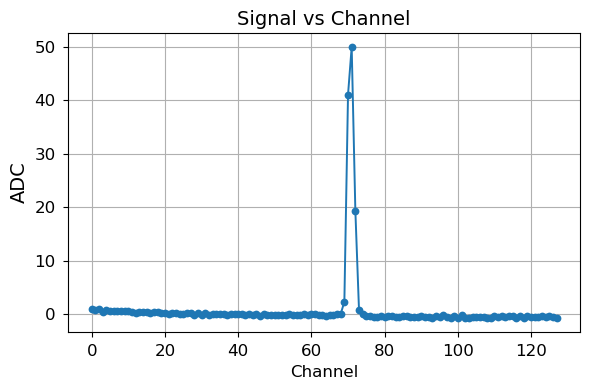

In [22]:
from scipy.stats import norm

file_path = r"C:\Users\Ephi\Dropbox\Silicon strip\Mehammed\Laserscan.txt"

# Load as a Table of data
laserscan = pd.read_csv(file_path, sep="\t", header=None, skiprows=1)   # skip a header row or metadata

# shape should be [num_positions, num_strips] or [events, channels]
print("Data shape:", laserscan.shape)

# Convert if decimal commas are used
laserscan = laserscan.apply(lambda col: col.astype(str).str.replace(",", ".").astype(float))

# Pedestal and Noise Calculation 

data = laserscan.T.values         # Transpose: rows = strips, columns = events
n_strips, n_events = data.shape  # shape: (strips, events) 

# Compute pedestal and noise
laserscan = np.mean(data, axis=1)
noise = np.std(data, axis=1)

# Pedestals and Noise per Strip
plt.figure(figsize=(6, 4))
#plt.subplot(1, 2, 1)
plt.plot(laserscan, marker='o', linestyle='-', label="laserscan")
plt.title("Signal vs Channel", fontsize = 14)
plt.ylabel("ADC", fontsize = 14)
plt.xlabel('Channel')
plt.grid(True)

# plt.subplot(1, 2, 2)
# plt.plot(noise, marker='s', linestyle='-', color='orange', label="Noise")
# plt.title("Noise (RMS) per Strip", fontsize = 14)
# plt.xlabel("Strip Number", fontsize = 14)
# plt.ylabel("ADC", fontsize = 14)
# plt.grid(True)

plt.tight_layout()
plt.savefig("C:/Users/Ephi/Dropbox/Silicon strip/Plots/signal vs channel.png")
plt.show()

Active strips: [69 70 71 72]


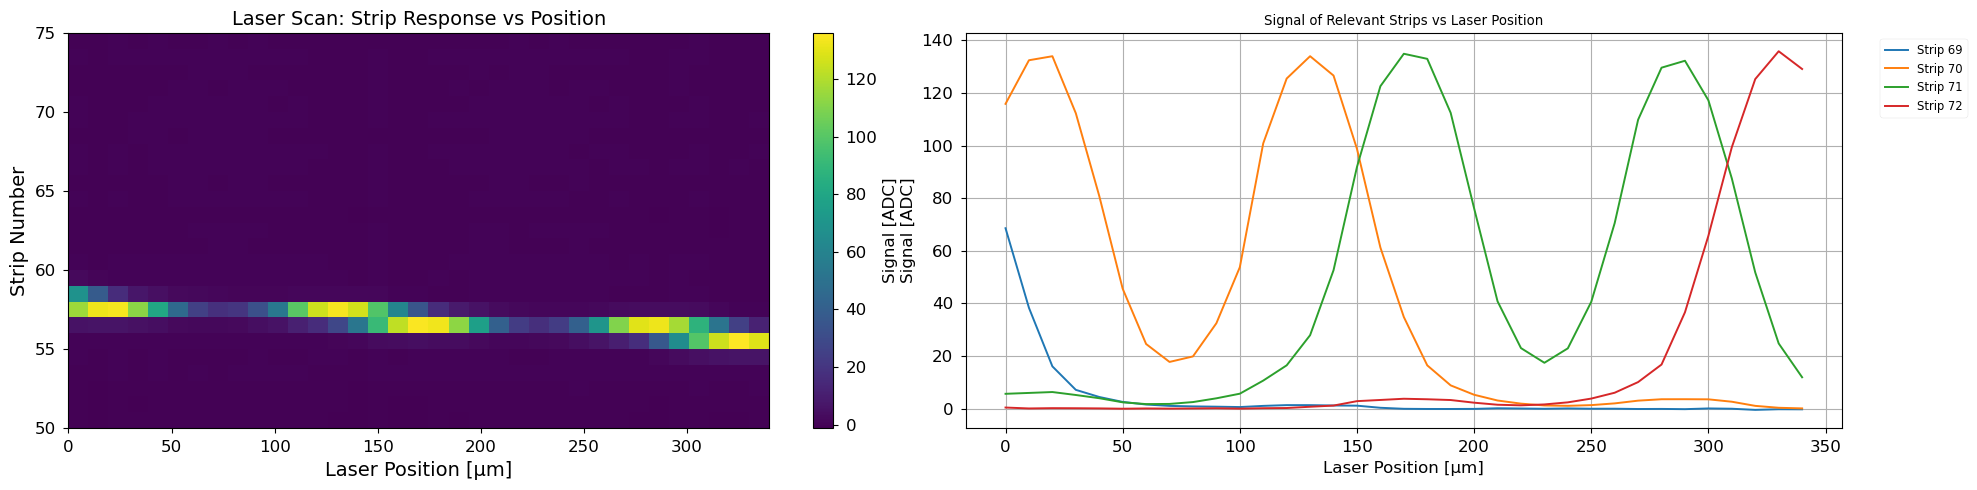

In [24]:
laser_scan_matrix = np.loadtxt(file_path)

# Shape and coordinate setup
n_positions, n_strips = laser_scan_matrix.shape
positions = np.arange(n_positions) * 10  # 10 µm steps per scan position

# Overview heatmap
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.imshow(laser_scan_matrix.T, aspect='auto', cmap='viridis',
           extent=[positions[0], positions[-1], 0, n_strips])
plt.colorbar(label='Signal [ADC]')
plt.xlabel("Laser Position [µm]", fontsize = 14)
plt.ylabel("Strip Number", fontsize = 14)
plt.title("Laser Scan: Strip Response vs Position", fontsize = 14)
plt.ylim(50, 75)
plt.tight_layout()

# Calculate active strips and analyze pitch
strip_signals = laser_scan_matrix.T
total_signal_per_strip = strip_signals.sum(axis=1)
active_strips = np.where(total_signal_per_strip > 0.05 * np.max(total_signal_per_strip))[0]
print(f'Active strips: {active_strips}')

# Plot signal of active strips

plt.subplot(1, 2, 2)
for strip in active_strips:
    plt.plot(positions, strip_signals[strip], label=f"Strip {strip}")
plt.xlabel("Laser Position [µm]")
plt.ylabel("Signal [ADC]")
plt.title("Signal of Relevant Strips vs Laser Position")
plt.grid(True)
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1.0), fontsize='small')
plt.tight_layout()
plt.savefig("C:/Users/Ephi/Dropbox/Silicon strip/Plots/Strip vs laser position.png")
plt.show()

In [25]:
# Estimate pitch from peaks
centers = []
for strip in active_strips:
    peaks, _ = find_peaks(strip_signals[strip], distance=2)
    if len(peaks) > 0:
        centers.append(positions[peaks[0]])

strip_pitch = np.mean(np.diff(sorted(centers))) if len(centers) >= 2 else np.nan

# Estimate laser width (FWHM) from central active strip
central_strip = active_strips[len(active_strips) // 2]
signal = strip_signals[central_strip]
half_max = np.max(signal) / 2
above_half = np.where(signal >= half_max)[0]
laser_width = positions[above_half[-1]] - positions[above_half[0]] if len(above_half) > 1 else np.nan

# Final results
{
    "Detected Active Strips": active_strips.tolist(),
    "Estimated Strip Pitch [µm]": strip_pitch,
    "Estimated Laser Width [µm]": laser_width
}

{'Detected Active Strips': [69, 70, 71, 72],
 'Estimated Strip Pitch [µm]': 33.333333333333336,
 'Estimated Laser Width [µm]': 160}

In [26]:
# List the available files after the reset to confirm the file name
import os

os.listdir("C:/Users/Ephi/Dropbox/Silicon strip/Mehammed");


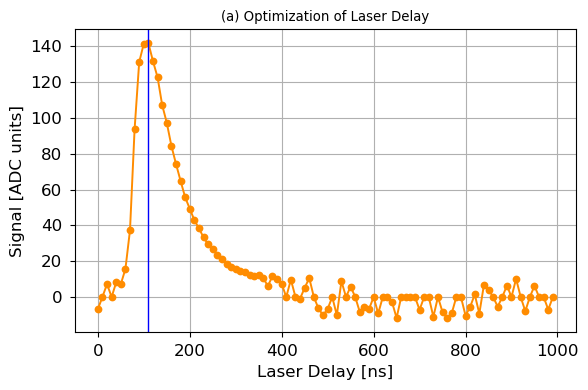

In [28]:
# Read the file as raw text and replace commas with periods
with open("C:/Users/Ephi/Dropbox/Silicon strip/Mehammed/Laserdelay.txt", "r", encoding="utf-8") as f:
    lines = f.readlines()

# Extract only data lines, starting after the header
data_lines = [line.replace(",", ".") for line in lines if line.strip() and not line.startswith(("1D", '"', "X"))]

# Convert cleaned lines to NumPy array
from io import StringIO
laser_delay_data = np.loadtxt(StringIO("".join(data_lines)))

# Separate columns: delay time and signal value
delay_times = laser_delay_data[:, 0]
signal_values = laser_delay_data[:, 1]

# Find the optimal delay corresponding to max signal
optimal_index = np.argmax(signal_values)
optimal_delay = delay_times[optimal_index]
max_signal = signal_values[optimal_index]

{
    "Optimal Laser Delay (ns)": optimal_delay,
    "Maximum Signal (ADC units)": max_signal
}

# Plot signal vs laser delay
plt.figure(figsize=(6, 4))
plt.plot(delay_times, signal_values, marker='o', linestyle='-', color='darkorange')
plt.axvline(optimal_delay, color='blue', linestyle='solid', linewidth=1)

plt.xlabel("Laser Delay [ns]")
plt.ylabel("Signal [ADC units]")
plt.title("(a) Optimization of Laser Delay")
plt.grid(True)
plt.tight_layout()

plt.savefig("C:/Users/Ephi/Dropbox/Silicon strip/Plots/Laser delay.png")
plt.show()

### CCEL

['hSignalVsVoltage;1']


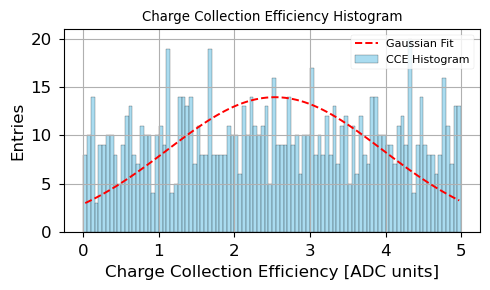

Mean CCE: 2.54, Standard Deviation: 1.43


In [30]:
from scipy.stats import norm

# Open the ROOT file
root_file = uproot.open("C:/Users/Ephi/Dropbox/Silicon strip/Mehammed/CCEL_output.root")

# Inspect file keys
print(root_file.keys()) 

hist = root_file["hSignalVsVoltage"]       # Access the histogram

# Get bin contents and edges
values = hist.values()
edges = hist.axis().edges()

# Get bin centers for plotting
centers = 0.5 * (edges[1:] + edges[:-1])

# Plot histogram
plt.figure(figsize=(5, 3))
plt.bar(centers, values, width=np.diff(edges), color='skyblue', alpha=0.7, label="CCE Histogram")
plt.xlabel("Charge Collection Efficiency [ADC units]")
plt.ylabel("Entries")
plt.title("Charge Collection Efficiency Histogram")
plt.grid(True)

# Gaussian Fit
mu, sigma = norm.fit(np.repeat(centers, values.astype(int)))  # fit on bin centers weighted by counts
x = np.linspace(min(centers), max(centers), 100)
plt.plot(x, norm.pdf(x, mu, sigma) * np.sum(values) * (x[1] - x[0]), 'r--',
         label='Gaussian Fit')
plt.legend()
plt.tight_layout()

plt.savefig("C:/Users/Ephi/Dropbox/Silicon strip/Plots/CCE.png")
plt.show()

print(f"Mean CCE: {mu:.2f}, Standard Deviation: {sigma:.2f}")


Extracted voltages: [0, 100, 10, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 20, 30, 40, 50, 60, 70, 80, 90]
(21, 127, 1)


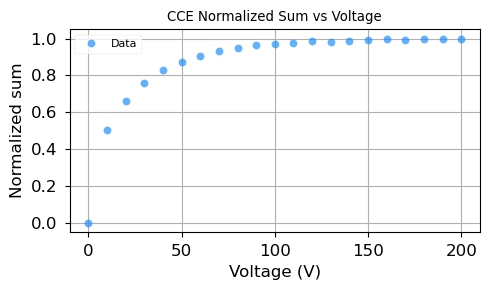

In [34]:
# read and store all the files in the folder CCEL
import os
import re

# Get the list of files in the folder
folder_path = "C:/Users/Ephi/Dropbox/Silicon strip/Mehammed/CCEL1/"
files = os.listdir(folder_path)

# Remove any non-text data (e.g., .DS_Store, folders, etc.)
files = [f for f in files if f.endswith('.txt')]

# Sort the files alphabetically
files.sort()
#print("Files found:", files)

# Extract voltage values safely using regex
voltage = []
clean_files = []
for f in files:
    match = re.match(r"(\d+)", f)
    if match:
        voltage.append(int(match.group(1)))
        clean_files.append(f)

print("Extracted voltages:", voltage)

# Create an empty list to store the data
data = []

# Loop over the clean files
for file in clean_files:
    df = pd.read_csv(os.path.join(folder_path, file), sep=';', header=None)
    df = df.drop(index=0)  # Remove the first row
    data.append(df)        # Store the data in the list

# Convert the list to a NumPy array
data = np.array(data, dtype=object)
print(data.shape)
# Flatten each DataFrame and convert to float arrays
flattened_data = np.array([np.array(d).flatten().astype(float) for d in data])

# Sum all the values for each voltage
sums = np.sum(flattened_data, axis=1)

# Normalize the sums
max_sum = np.max(sums)
norm = sums / max_sum

# Order the data by the voltage
voltage, norm = zip(*sorted(zip(voltage, norm)))

# Plot the normalized sum vs. voltage
plt.figure(figsize=(5, 3))
plt.plot(voltage, norm, 'o', color='dodgerblue', alpha=0.7, label='Data')
plt.xlabel('Voltage (V)')
plt.ylabel('Normalized sum')
plt.title('CCE Normalized Sum vs Voltage')
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.savefig("C:/Users/Ephi/Dropbox/Silicon strip/Plots/CCE normalized vs bias voltage.png")
plt.show()


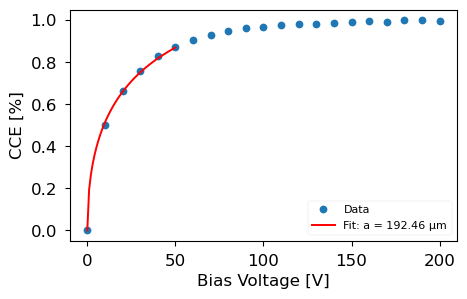

Fit parameters and their errors:
a = 192.46043572651266 +/- 6.8181952542610915


In [ ]:
#now fit the data of the CCEL
def f(x, a):
    D = 300
    U_dep = 90
    return (1 - np.exp(-(D * np.sqrt(x/U_dep))/a)) / (1 - np.exp(-D/a))


#set the range of the parameter a allowed for the fit
a_min = 1
a_max = 300

# Filter the data within the fit range
voltage = np.array(voltage)
norm = np.array(norm)

# fit the voltage_q and norm_q
popt, pcov = curve_fit(f, voltage[:9], norm[:9], )
plt.figure(figsize=(5, 3))
# Plot the data
plt.plot(voltage, norm, 'o', label='Data')

# Plot the fit
x_plot = np.linspace(0, 50, 50)  # Generate x values for the plot
plt.plot(x_plot, f(x_plot, *popt), label=f'Fit: a = {popt[0]:.2f} µm', color='red')

plt.xlabel('Bias Voltage [V]')
plt.ylabel('CCE [%]')
plt.legend()

plt.savefig('C:/Users/Ephi/Dropbox/Silicon strip/Plots/CCEL_fit.png')
plt.show()

# print the fit parameters
print('Fit parameters and their errors:')
print('a =', popt[0], '+/-', np.sqrt(pcov[0, 0]))

### CCEQ

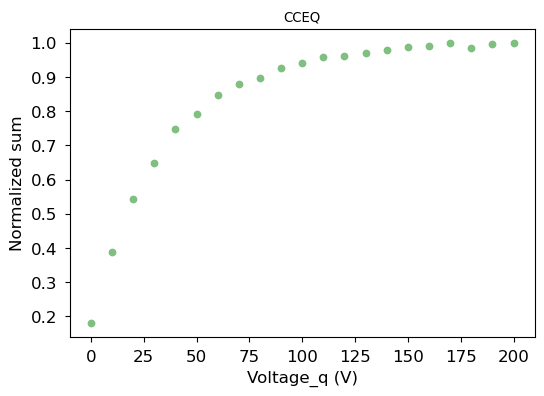

In [37]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt

folder_path = "C:/Users/Ephi/Dropbox/Silicon strip/source_measurement/"
files = os.listdir(folder_path)

pattern = re.compile(r"(\d+)_Cluster_adc_entries\.txt")

voltage_q = []
valid_files = []

for f in files:
    match = pattern.match(f)
    if match:
        voltage_q.append(int(match.group(1)))
        valid_files.append(f)

# Sort both by voltage value
voltage_q, valid_files = zip(*sorted(zip(voltage_q, valid_files)))

data = []

for file in valid_files:
    full_path = os.path.join(folder_path, file)
    with open(full_path, "r") as f:
        content = f.read()
    values_str = content.split()

    values = []
    for val in values_str:
        try:
            values.append(float(val))
        except ValueError:
            continue
    data.append(values)

# Ensure uniform length
min_len = min(len(d) for d in data)
data = np.array([d[:min_len] for d in data])

# Sum values
sums = [sum(row) for row in data]
sums = np.array(sums)
norm_q = sums / np.max(sums)

# Plot
plt.plot(voltage_q, norm_q, 'o', color='green', alpha=0.5, label='Data')
plt.xlabel('Voltage_q (V)')
plt.ylabel('Normalized sum')
plt.title('CCEQ')
plt.savefig("C:/Users/Ephi/Dropbox/Silicon strip/Plots/CCEQ.png")
plt.show()

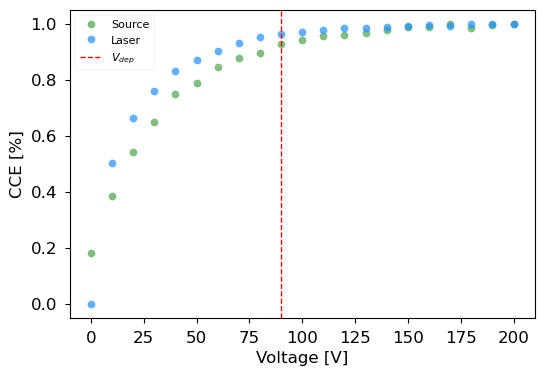

In [38]:
#plot CCEQ and CCEL in the same graph
#plot the data
plt.plot(voltage_q, norm_q, 'o', label = 'Source', color='green', alpha=0.5)
plt.plot(voltage, norm, 'o', label = 'Laser', color='dodgerblue', alpha=0.7)
plt.xlabel('Voltage [V]')
plt.ylabel('CCE [%]')

#add v line at 80
plt.axvline(90, color='r', linestyle='dashed', linewidth=1, label='$V_{dep}$')

plt.legend()
#save the plot
plt.savefig("C:/Users/Ephi/Dropbox/Silicon strip/Plots/CCEL and CCEQ.png")

plt.show()

### CCEQ ANALYSIS — Mean Cluster Energy vs Voltage

[11.801105028238826, 74.54017031903437, 24.536503330297283, 76.28329473771497, 76.61055920841939, 77.2132446501814, 78.30974450681175, 78.4935136090045, 78.2358836036591, 79.00779127294206, 79.55632698369791, 79.89977060529488, 79.86499195436632, 34.98722422617594, 43.873310772416396, 52.095766969585654, 56.97686725281137, 62.69375107580315, 67.04170077260409, 70.41575661851353, 72.91488250998881]


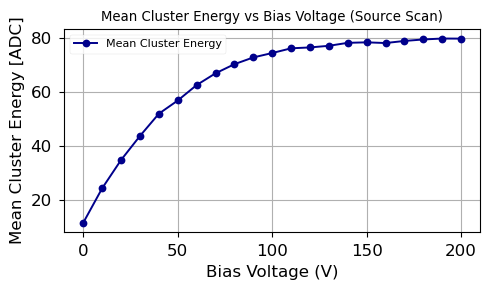

In [39]:
import os
import re

folder = "C:/Users/Ephi/Dropbox/Silicon strip/source_measurement/"
pattern = re.compile(r"(\d+)_Cluster_adc_entries\.txt")

voltage_list = []
mean_energies = []

for fname in os.listdir(folder):
    match = pattern.match(fname)
    if not match:
        continue
    voltage = int(match.group(1))
    with open(os.path.join(folder, fname), "r") as f:
        values = []
        for line in f:
            try:
                values.append(float(line.strip()))
            except ValueError:
                continue
    if values:
        voltage_list.append(voltage)
        mean_energies.append(np.mean(values))
print(mean_energies)
# Sort and plot
voltage_list, mean_energies = zip(*sorted(zip(voltage_list, mean_energies)))

plt.figure(figsize=(5, 3))
plt.plot(voltage_list, mean_energies, 'o-', color='darkblue', label='Mean Cluster Energy')
plt.xlabel('Bias Voltage (V)')
plt.ylabel('Mean Cluster Energy [ADC]')
plt.title('Mean Cluster Energy vs Bias Voltage (Source Scan)')
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.savefig("C:/Users/Ephi/Dropbox/Silicon strip/Plots/mean cluster energy vs Bias voltage.png")
plt.show()

## Large Source Scan (1,000,000 Events)
#### (a) Clusters per event & channels per cluster

(128,)
(128,)


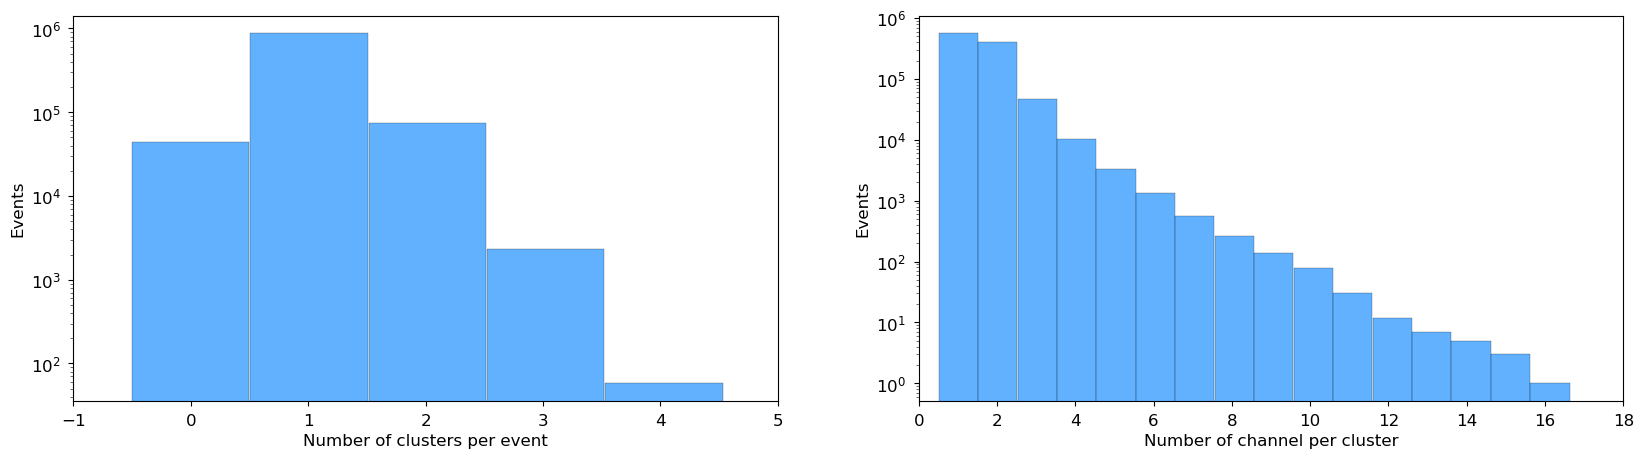

In [40]:
# Load cluster statistics
num_clu = pd.read_csv("C:/Users/Ephi/Dropbox/Silicon strip/source_measurement/number_of_clusters.txt", header = None)
clus_size = pd.read_csv("C:/Users/Ephi/Dropbox/Silicon strip/source_measurement/cluster_size.txt", header = None)
#remove the first row
num_clu = num_clu.drop([0])

#convert the values to float
num_clu = num_clu.astype(float)
num_clu = num_clu.values
num_clu = num_clu.reshape(num_clu.shape[0])
print(num_clu.shape)

#remove the first row
clus_size = clus_size.drop([0])

#convert the values to float
clus_size = clus_size.astype(float)
clus_size = clus_size.values
clus_size = clus_size.reshape(clus_size.shape[0])
print(clus_size.shape)

#plot the data as histogram, the position is the bin and the value is the frequency
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.bar(np.linspace(0,num_clu.shape[0],num_clu.shape[0]), num_clu, width=1.0, color='dodgerblue',alpha = 0.7, label='Data')
plt.xlim(-1, 5)
plt.yscale('log')
plt.xlabel('Number of clusters per event')
plt.ylabel('Events')

#plot the data as histogram, the position is the bin and the value is the frequency
plt.subplot(1, 2, 2)
plt.bar(np.linspace(0,clus_size.shape[0],clus_size.shape[0]), clus_size, width=1.0, color='dodgerblue',alpha = 0.7, label='Data')
plt.yscale('log') #set log scale
plt.xlim(0, 18)
plt.xlabel('Number of channel per cluster')
plt.ylabel('Events')

#save the plot
plt.savefig("C:/Users/Ephi/Dropbox/Silicon strip/Plots/number_of_clusters.png")
plt.show()

### (b) Hitmap (Events per Channel)

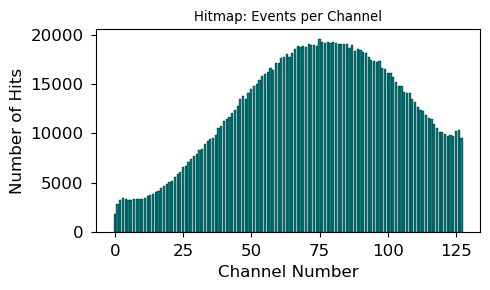

In [41]:
hitmap = np.loadtxt("C:/Users/Ephi/Dropbox/Silicon strip/source_measurement/hitmap.txt")
plt.figure(figsize=(5, 3))
plt.bar(range(len(hitmap)), hitmap, color='teal')
plt.title("Hitmap: Events per Channel")
plt.xlabel("Channel Number")
plt.ylabel("Number of Hits")
plt.tight_layout()
plt.savefig("C:/Users/Ephi/Dropbox/Silicon strip/Plots/Hitmap.png")
plt.show()


### (c) Plot Energy Spectrum (ADC and keV)

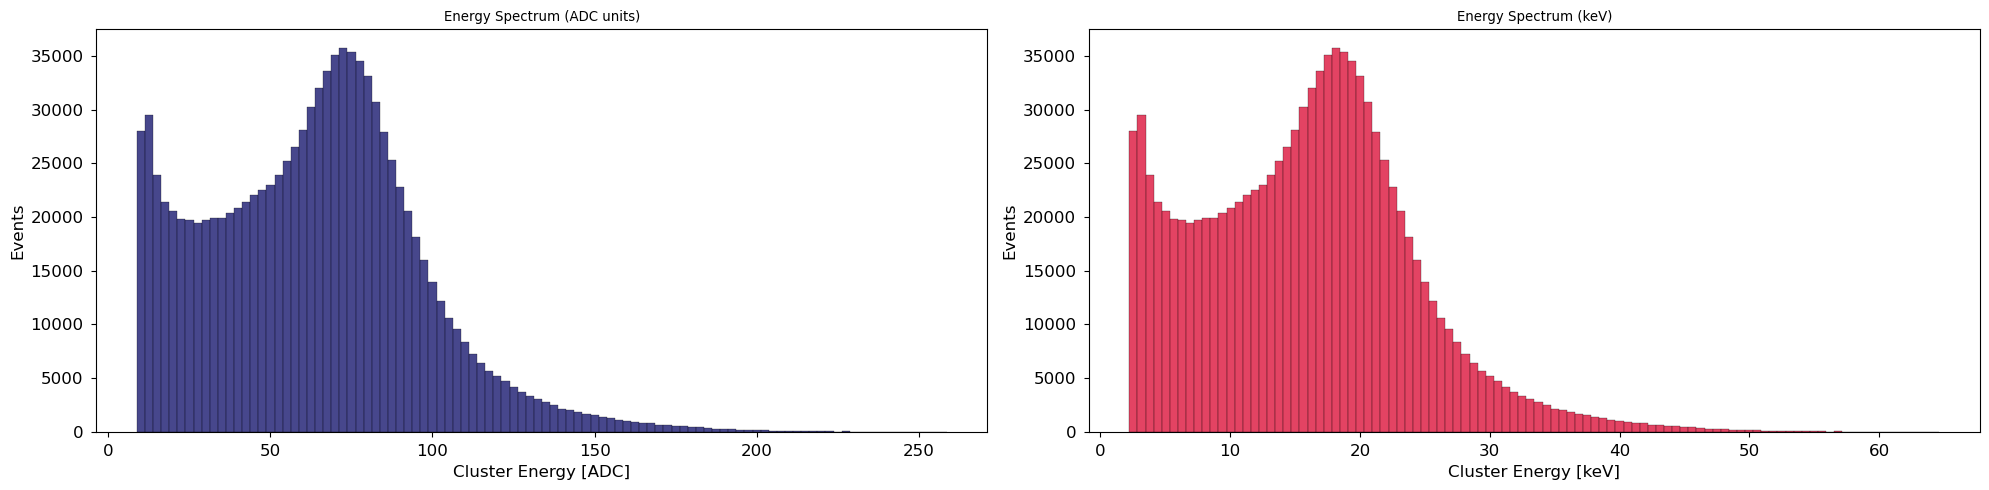

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# File path
file_path = "C:/Users/Ephi/Dropbox/Silicon strip/source_measurement/Cluster_adc_entries.txt"
clean_adc_values = []

with open(file_path, "r") as f:
    for line in f:
        # Skip empty or non-numeric lines
        parts = line.strip().split()
        try:
            # Use the last column if multiple columns (e.g., ADC entry)
            if len(parts) >= 1:
                value = float(parts[-1])
                clean_adc_values.append(value)
        except ValueError:
            continue  # Skip lines with non-numeric content

adc_values = np.array(clean_adc_values)

# Plot the ADC and keV histograms
plt.figure(figsize=(20, 5))

# ADC histogram
plt.subplot(1, 2, 1)
plt.hist(adc_values, bins=100, color='midnightblue', alpha=0.8)
plt.xlabel("Cluster Energy [ADC]")
plt.ylabel("Events")
plt.title("Energy Spectrum (ADC units)")

# Convert ADC to keV (e.g., 1 ADC = 0.25 keV)
keV_values = adc_values * 0.25
plt.subplot(1, 2, 2)
plt.hist(keV_values, bins=100, color='crimson', alpha=0.8)
plt.xlabel("Cluster Energy [keV]")
plt.ylabel("Events")
plt.title("Energy Spectrum (keV)")

plt.tight_layout()
plt.savefig("C:/Users/Ephi/Dropbox/Silicon strip/Plots/Energy spectrum.png")
plt.show()

In [43]:
print(f"Total valid entries: {len(adc_values)}")
print(f"Mean ADC: {np.mean(adc_values):.2f}")
print(f"Max ADC: {np.max(adc_values):.2f}")

Total valid entries: 1032986
Mean ADC: 63.70
Max ADC: 258.59


In [44]:
from scipy.stats import mode

mean_adc = np.mean(adc_values)
mpv_adc = mode(np.round(adc_values, 0), keepdims=True).mode[0]

print(f"Mean ADC Energy = {mean_adc:.2f}")
print(f"MPV ADC Energy = {mpv_adc:.2f}")
print(f"Mean Energy = {mean_adc * 0.25:.2f} keV")
print(f"MPV Energy = {mpv_adc * 0.25:.2f} keV")


Mean ADC Energy = 63.70
MPV ADC Energy = 11.00
Mean Energy = 15.92 keV
MPV Energy = 2.75 keV


(562927, 1)


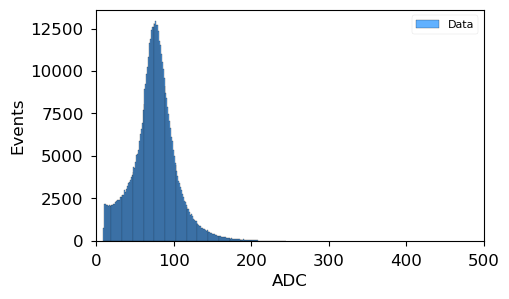

In [45]:
# Read the file line by line
with open('C:/Users/Ephi/Dropbox/Silicon strip/source_measurement/Cluster_adc_entries.txt', 'r',encoding="utf-8") as file:
    lines = file.readlines()

# Initialize an empty list to store NumPy arrays
arrays = []

# Process each line
for line in lines:
    try:
        values = line.strip().split(',')  # Split the line by commas
        floats = [float(value) for value in values]  # Convert values to floats
        array = np.array(floats)   # Convert the list of floats to a NumPy array
        arrays.append(array)   # Append the NumPy array to the list
    except ValueError:
        continue  # Skip lines that cannot be converted to float (header or comment)

# Convert the list of NumPy arrays to a single NumPy array
result_array = np.array(arrays)
print(result_array.shape) # Print the resulting NumPy array

#sum all the values for each row
for i in range(result_array.shape[0]):
    result_array[i] = np.sum(result_array[i])

#plot the data as histogram, the position is the bin and the value is the frequency
plt.figure(figsize=(5, 3))
aaaa = plt.hist(result_array, bins=200, color='dodgerblue',alpha = 0.7, label='Data')
plt.xlim(0, 200)
plt.ylabel('Events')
plt.xlabel('ADC')
plt.legend()

plt.xlim(0, 500)

#save the plot
plt.savefig("C:/Users/Ephi/Dropbox/Silicon strip/Plots/Cluster_adc_entries.png")
plt.show()